---
title: "Data gathering"
format: 
  html:
    code-fold: true
execute: 
  enabled: true
---

## Introduction: 
In recent years, the automotive industry has witnessed a transformative shift towards sustainable and eco-friendly transportation solutions, exemplified by the increasing popularity of electric vehicles (EVs). Among the trailblazers in this revolution is Tesla, a pioneering company that has significantly contributed to the rise of electric cars on our roads. As society embraces cleaner energy alternatives, concerns about the safety of electric cars, particularly in comparison to their traditional gas-powered counterparts, have become a focal point of discussion. This study endeavors to conduct a comprehensive analysis of traffic accidents involving electric cars, with a specific emphasis on Tesla vehicles, and draw meaningful comparisons with incidents involving traditional gas-powered cars. By examining relevant data, trends, and contributing factors, this research aims to shed light on the safety landscape of electric vehicles, providing valuable insights for both policymakers and the general public as we navigate the evolving landscape of transportation technologies.

# First dataset:
### Name: Tesla Deaths 
link to the dataset: <https://www.kaggle.com/datasets/thedevastator/tesla-accident-fatalities-analysis-and-statistic>

## Summary of the data:

1. Case #: Unique identifier for each case. (String)
2. Year: Year of the accident. (Integer)
3. Date: Date of the accident. (Date)
4. Country: The country where the accident occurred. (String)
5. State: State where the accident occurred. (String)
6. Description: Description of the accident. (String)
7. Deaths: Number of Deaths (Int)
8. Tesla driver: Whether the Tesla driver was killed in the accident. (Boolean)
9. Tesla occupant: Whether a Tesla occupant was killed in the accident. (Boolean)
10. Other Vehicle: whether the Tesla crashed another vehicle (Boolean)
11. Cyclist/ Peds: Whether Tesla killed a Cyclist/Pedestrian in the accident. (Boolean)
12. SLA + cycl / peds: Tesla + Cycle / Pedestrian (Boolean)
13. Autopilot claimed: People who have claimed Auto Pilot (Boolean)
14. Verified Tesla Autopilot Death: Verified Tesla Autopilot Death (Boolean)
15. Verified Tesla Autopilot Death & All Deaths Reported to NHTSA SGO : Verified Tesla 
16. Autopilot Death & All Deaths Reported to NHTSA SGO (Boolean)
17. Source: Source of the data. (String)
18. Source: Source of the data. (String)
19. Source: Source of the data. (String)
20. Note: Note (String)
21. Model: Model of the Tesla vehicle involved in the accident. (String)
22. Source: Source of the data. (String)
23. Deceased 1: 1st Dead person's Name (String)
24. Deceased 2: 2nd Dead person's Name (String)
25. Deceased 3: 3rd Dead person's Name (String)
26. Deceased 4: 4th Dead person's Name (String)

### Quick exploration of the data: 

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\23898\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\23898\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Overview of the dataset

In [2]:
df = pd.read_csv("./Data/Tesla Deaths - Deaths.csv")
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


# Second dataset:
### Name: UK Road Safety: Traffic Accidents and Vehicles (gas car)
![](./images/HEADER-MOBILE-GreatBritainroadtrafficaccidentreport_HxW0676x1006_72eadcd2-256c-4153-9c8e-5b2ba8731839.webp){width=300}

#### link: <https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles>

## Summary:
The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The creation of this dataset was inspired by the one previously published by Dave Fisher-Hickey. However, this current dataset features the following significant improvements over its predecessor:

1. It covers a wider date range of events.
2. Most of the coded data variables have been transformed to textual strings using relevant lookup tables, enabling more efficient and "human-readable" analysis.
3. It features detailed information about the vehicles involved in the accidents.



### Overview of the dataset 

In [3]:
data = pd.read_csv('./Data/RoadAccident.csv')
data.drop(['Accident_Index','Datetime'], axis = 1,inplace=True) 
data

,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,...,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,Fine,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
1,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,Fine,...,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go,Slight
2,51.492515,-0.168130,London,Urban,Unclassified,5,30,Single carriageway,Dry,Fine,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Journey as part of work,998,Petrol,Nissan,Car,Going ahead,Slight
3,51.504784,-0.193863,London,Urban,A,2,30,Single carriageway,Dry,Fine,...,T or staggered junction,Mid Junction - on roundabout or on main road,Offside,Journey as part of work,2179,Heavy oil,Citroen,Van,Turning right,Slight
4,51.522072,-0.212927,London,Urban,B,3,30,Single carriageway,Wet or damp,Fine,...,T or staggered junction,Approaching junction or waiting/parked at junc...,Nearside,Journey as part of work,2198,Heavy oil,Ford,Van,Overtaking,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75545,56.531008,-2.945169,Scotland,Rural,A,9,70,Dual carriageway,Wet or damp,Raining,...,T or staggered junction,Approaching junction or waiting/parked at junc...,Front,Other/Not known,2199,Heavy oil,Kia,Car,Going ahead,Fatal_Serious
75546,56.677867,-3.688719,Scotland,Rural,A,10,70,Dual carriageway,Dry,Fine,...,T or staggered junction,Cleared junction or waiting/parked at junction...,Front,Other/Not known,1598,Petrol,Vauxhall,Car,Going ahead,Fatal_Serious
75547,55.720385,-2.654035,Scotland,Rural,A,9,60,Single carriageway,Dry,Fine,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1598,Heavy oil,Audi,Car,Going ahead,Fatal_Serious
75548,54.850068,-4.925632,Scotland,Rural,B,5,60,Single carriageway,Dry,Fine,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1000,Petrol,BMW,Motorcycle,Going ahead,Fatal_Serious


### Check for the dimension of the data set

In [4]:
print('There are a total of {} rows and {} columns in the original dataset'.format(data.shape[0],data.shape[1]))

There are a total of 75550 rows and 31 columns in the original dataset


### Check for null values

In [5]:
print("Any null values in the original dataset?: {}".format(data.isnull().values.any()))

Any null values in the original dataset?: False


## Third dataset (acquired using News-API and focused on the topic of 'Tesla-related accident')

## Summary:
I obtained the ensuing dataset by utilizing the News-API to search for articles pertaining to Tesla accidents. I also processed and curated the articles, saving them in a structured dataset for subsequent analysis. Furthermore, I generated a word cloud to see prominent keywords within the corpus.

In [6]:
#| output: false
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
API_KEY='2a0218c20cdd48d29d44f1271c267a25'
baseURL = "https://newsapi.org/v2/everything?"

total_requests= 20
verbose=True
TOPIC='Tesla accident'
URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC,
            'sortBy': 'relevancy',
            'totalRequests': 1}

response = requests.get(baseURL, URLpost)  
response = response.json() 

# PRETTY PRINT
# https://www.digitalocean.com/community/tutorials/python-pretty-print-json

from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")
with open(timestamp+'-newapi-raw-data.json', 'w') as file_georetown:
    json.dump(response, file_georetown, indent=4)

def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

article_list=response['articles']   
article_keys=article_list[0].keys()
index=0
cleaned_data1=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='author'):
            author=string_cleaner(article[key])

            if(src in author): 
                print(" AUTHOR ERROR:",author);author='NA'
            tmp.append(author)

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        if(key=='description'):
            tmp.append(string_cleaner(article[key]))

        if(key=='content'):
            tmp.append(string_cleaner(article[key]))

        if(key=='publishedAt'):
           #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date=article[key]
            if(not ref.match(date)):
               print(" DATE ERROR:",date); date="NA"
            tmp.append(date)

    cleaned_data1.append(tmp)
    index+=1

df = pd.DataFrame(cleaned_data1).iloc[:, [2, 5]]
df.columns = ["title", "content"]
df.to_csv('./Data/newapiTesla.csv', index=False)

#------------------------------------------
# 0
#------------------------------------------
----------------
source
{'id': 'engadget', 'name': 'Engadget'}
----------------
----------------
author
Nathan Ingraham
----------------
----------------
title
Tesla's Cybertruck is a dystopian, masturbatory fantasy
----------------
----------------
description
It’s been four years since Tesla first announced the Cybertruck, a hideously ugly electric pickup truck that didn’t seem to actually improve on EVs or pickups in any meaningful way. Instead, the 6,600-pound mass of “stainless super steel” seems to be more the…
----------------
----------------
url
https://www.engadget.com/teslas-cybertruck-is-a-dystopian-masturbatory-fantasy-225648188.html
----------------
----------------
urlToImage
https://s.yimg.com/ny/api/res/1.2/NHniUP7yhBNCPuKoA07M.A--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDg-/https://s.yimg.com/os/creatr-uploaded-images/2023-11/28a6c9c0-8f7c-11ee-9ef6-ee96ddf3d2a3
----------------
-

In [7]:
pd.DataFrame(cleaned_data1)

,0,1,2,3,4,5
0,engadget,nathan ingraham,"tesla's cybertruck is a dystopian, masturbator...",its been four years since tesla first announce...,2023-11-30T22:56:48Z,its been four years since tesla first announce...
1,boing boing,natalie dressed,"tesla knew about defects in ""self-driving"" system",a recent fatal accident involving tesla's auto...,2023-11-25T19:54:09Z,a recent fatal accident involving tesla's auto...
2,readwrite,sam shedden,tesla in fresh legal battle over self-driving ...,"an american judge has suggested elon musk, amo...",2023-11-23T13:49:29Z,"an american judge has suggested elon musk, amo..."
3,autoblog,jonathon ramsey,watch as submerged tesla model x at florida bo...,"filed under: video,green,weird car news,tesla,...",2023-11-16T15:13:00Z,this incident from october is still missing so...
4,autoblog,reuters,tesla launched its own car insurance these dri...,"filed under: green,tesla,insurance,ownership,e...",2023-11-21T16:00:00Z,"in february, mark bova purchased a used 2018 t..."
...,...,...,...,...,...,...
95,barron's,,musk warns of troubles at x what its demise co...,"microsoft joins openai board, general motors i...",2023-11-30T11:50:00Z,"elon musk, chief executive of tesla and the wo..."
96,barron's,al root,"buy gm stock, not ford, says wall street",gm stock caught an upgrade to buy at mizuho gm...,2023-12-04T12:30:00Z,general motors shares look set to continue the...
97,seclistsorg,,risks digest 3395,posted by risks list owner on dec 02risks-list...,2023-12-02T23:41:34Z,from: risks list owner &lt;risko () csl sri co...
98,techcrunch,rebecca bellan,"florida judge finds tesla, elon musk knew of d...","there is ""reasonable evidence"" to conclude tha...",2023-11-22T13:45:05Z,there is “reasonable evidence” to conclude tha...


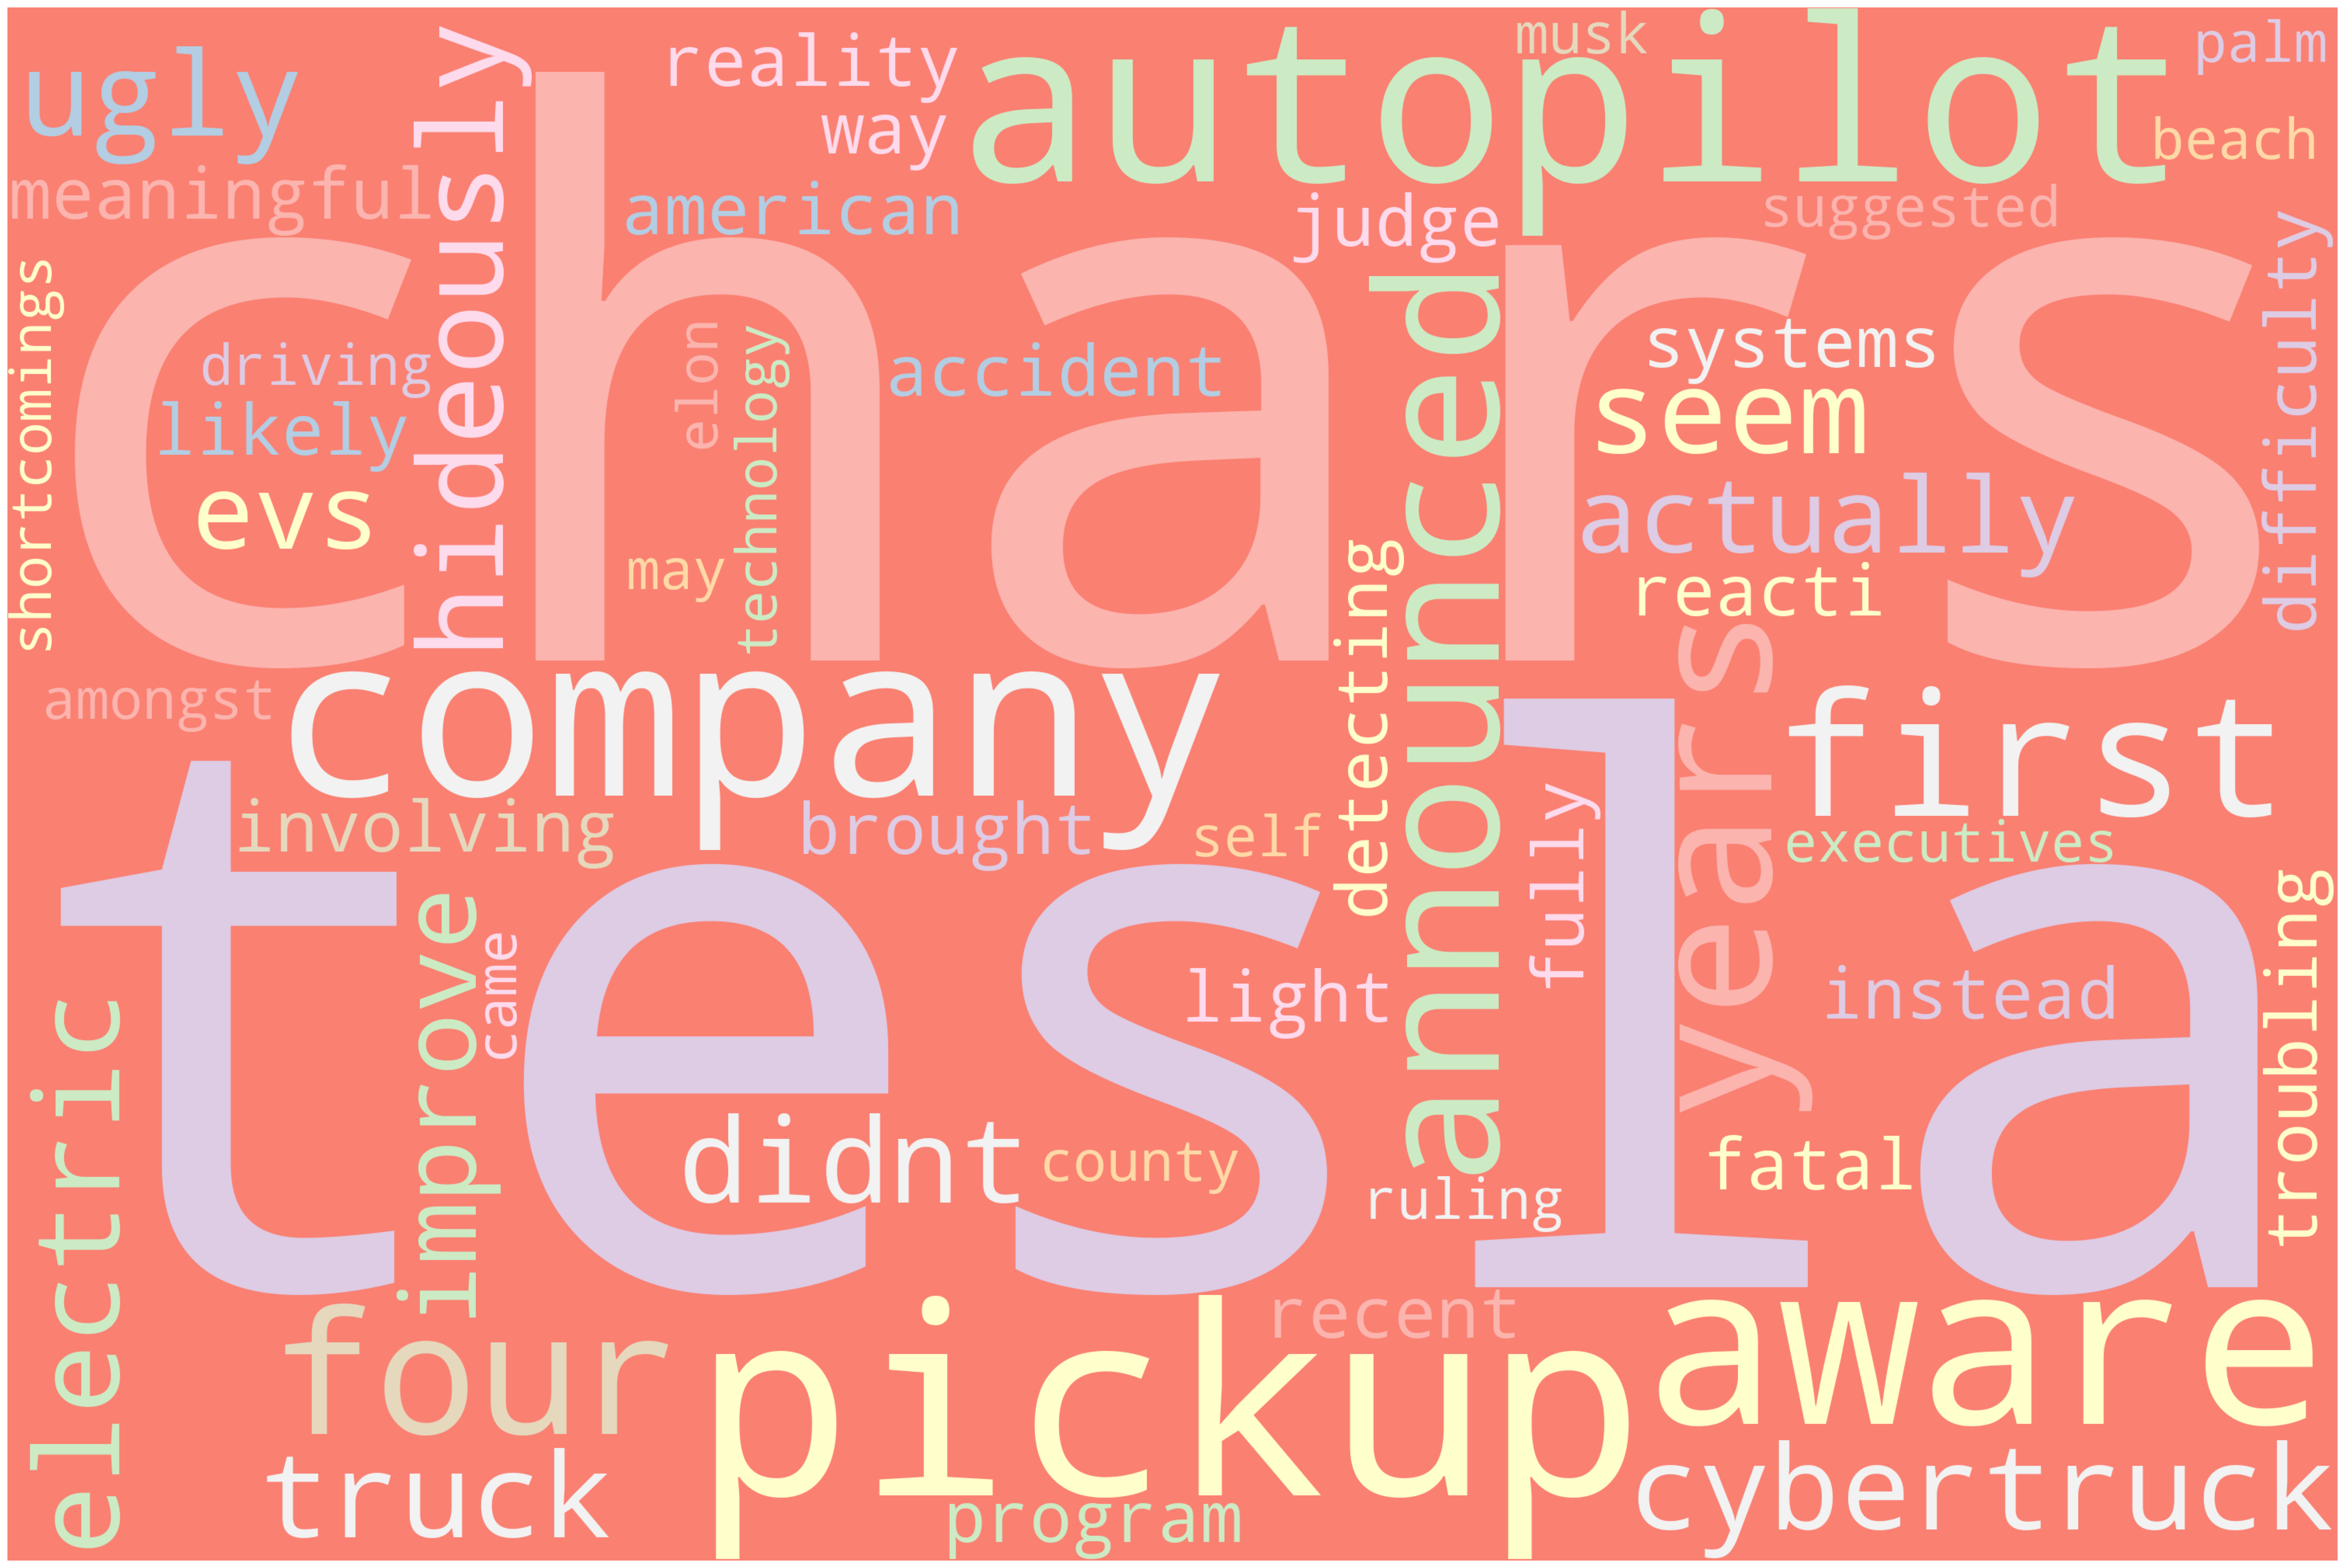

In [8]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud) 
        plt.axis("off")

    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()
df = pd.read_csv("./Data/newapiTesla.csv")
text = df.iat[0,1] + df.iat[1,1] + df.iat[2,1]
generate_word_cloud(text)